<h1 style="text-align: center;">Principal component analysis</h1>

# Teori

Akan dilakukan proyeksi dari data berdimensi $M$ menjadi berdimensi $D$.

PCA akan mendefinisikan $D$ vektor, $\mathbf{w}_{d}$, masing-masing berdimensi $M$. Elemen ke $d$ dari proyeksi $x_{nd}$ di mana $\mathbf{x}_{nd} = [ x_{n1}, x_{n2}, \ldots, x_{nD} ]^{\mathrm{T}}$ dihitung sebagai:

$$
x_{nd} = \mathbf{w}^{\mathrm{T}}_{d} \mathbf{y}_{n}
$$


Proses pembelajaran dalam hal ini adalah berapa dimensi $D$ dan memilih vektor proyeksi $\mathbf{w}_{d}$ untuk setiap dimensi.

PCA menggunakan variansi pada ruang yang diproyeksikan sebagai kriteria untuk memilih $\mathbf{w}_{d}$.

Misalnya: $\mathbf{w}_{1}$ adalah proyeksi yang akan membuat variansi pada $x_{n1}$ semaksimal mungkin.

Dimensi proyeksi kedua juga dipilih untuk memaksimalkan variansi, namum $\mathbf{w}_{2}$ harus ortogonal terhadap $\mathbf{w}_{1}$:
$$
\mathbf{w}_{1}^{\mathrm{T}} \mathbf{w}_{1} = 0
$$

Begitu juga untuk dimensi proyeksi yang ketiga dan seterusnya.

Secara umum:
$$
\mathbf{w}_{i}^{\mathrm{T}} \mathbf{w}_{j} = 0 \, \forall\, j \neq i
$$

Asumsi:
$$
\bar{\mathbf{y}} = \frac{1}{N} \sum_{n=1}^{N} \mathbf{y}_{n} = 0
$$

Misalkan kita ingin mencari proyeksi ke $D=1$ dimensi, dalam kasus ini hasil proyeksi adalah nilai skalar $x_{n}$ untuk tiap observasi yang diberikan oleh:
$$
x_{n} = \mathbf{w}^{\mathsf{T}} \mathbf{y}_{n}
$$
dan variansi $\sigma^{2}_{x}$ diberikan oleh:
$$
\sigma^{2}_{x} = \frac{1}{N} \sum_{n=1}^{N} \left( x_{n} - \bar{x} \right)^2
$$

Dengan asumsi bahwa $\bar{y} = 0$:
$$
\begin{align}
\bar{x} & = \frac{1}{N} \sum_{n=1}^{N} \mathbf{w}^{\mathsf{T}} \mathbf{y}_{n} \\
& = \mathbf{w}^{\mathsf{T}} \left(
\frac{1}{N} \sum_{n=1}^{N} \mathbf{y}_{n}
\right) \\
& = \mathbf{w}^{\mathsf{T}} \bar{\mathbf{y}} \\
& = 0
\end{align}1
$$

sehingga variansinya menjadi:
$$
\begin{align}
\sigma_{x}^{2} & = \frac{1}{N} \sum_{n=1}^{N} x^{2}_{n} \\
& = \frac{1}{N} \sum_{n=1}^{N} \left(
\mathbf{w}^{\mathsf{T}} \mathbf{y}_{n} \right)^2 \\
& = \frac{1}{N} \sum_{n=1}^{N} \mathbf{w}^{\mathsf{T}} \mathbf{y}_{n}
\mathbf{y}_{n}^{\mathsf{T}} \mathbf{w} \\
& = \mathbf{w}^{\mathsf{T}} 
\left( \frac{1}{N} \sum_{n=1}^{N}
\mathbf{y}_{n} \mathbf{y}_{n}^{\mathsf{T}}
\right)
\mathbf{w} \\
& = \mathbf{w}^{\mathsf{T}} \mathbf{C} \mathbf{w}
\end{align}
$$

$\mathbf{C}$ adalah matriks kovariansi dari sampel:
$$
\mathbf{C} = \frac{1}{N} \sum_{n=1}^{N}
(\mathbf{y}_{n} - \bar{\mathbf{y}})
(\mathbf{y}_{n} - \bar{\mathbf{y}})^{\mathsf{T}}
$$
di mana $\bar{\mathbf{y}} = 0$ dalam kasus yang kita tinjau.


# Kode program

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import IPython
IPython.display.set_matplotlib_formats("svg")

Generate data:

In [8]:
np.random.seed(1234)

In [9]:
Y_1 = np.random.randn(20,2)
Y_2 = np.random.randn(20,2) + 5.0
Y_3 = np.random.randn(20,2) - 5.0

In [20]:
Y = np.concatenate( (Y_1, Y_2, Y_3), axis=0 );

Add random dimensions:

In [27]:
Ndata = Y.shape[0]
Y = np.concatenate( (Y, np.random.randn(Ndata,5)), axis=1)

In [30]:
labels = np.concatenate( ([0]*20, [1]*20, [2]*20) )

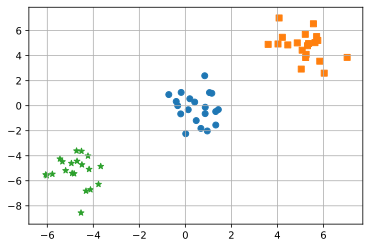

In [68]:
plt.clf()
markers = ["o", "s", "*"]
for i in range(3):
    idx = labels==i
    plt.scatter(Y[idx,0], Y[idx,1], marker=markers[i])
plt.grid()

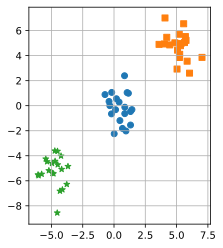

In [81]:
plt.clf()
markers = ["o", "s", "*"]
for i in range(3):
    idx = labels==i
    plt.scatter(Y[idx,0], Y[idx,1], marker=markers[i])
plt.gca().set_aspect("equal", "box")
plt.grid()

In [45]:
ybar = np.mean(Y,axis=0)
ybar

array([ 0.28668126, -0.21866308,  0.10019644, -0.06558056,  0.26618764,
       -0.026768  , -0.22730064])

In [46]:
Yshifted = Y - ybar

In [48]:
np.mean(Yshifted,axis=0)

array([1.77635684e-16, 1.33226763e-16, 2.03540888e-17, 7.40148683e-18,
       1.85037171e-17, 0.00000000e+00, 1.55431223e-16])

Covariance matrix:

In [57]:
C = np.matmul( Yshifted.transpose(), Yshifted )
C

array([[ 1.02183366e+03,  9.85161812e+02, -3.47147734e+01,
         1.07028313e+01, -2.27679131e+01,  2.30185268e+01,
        -3.22169370e+01],
       [ 9.85161812e+02,  1.07518351e+03, -1.98135371e+01,
         1.75469040e+01, -3.54255759e+01,  1.02267916e+01,
        -2.51415909e+01],
       [-3.47147734e+01, -1.98135371e+01,  5.10615076e+01,
        -6.40710134e+00, -4.99355545e+00,  1.78224311e-01,
         1.22616540e+01],
       [ 1.07028313e+01,  1.75469040e+01, -6.40710134e+00,
         4.43494652e+01,  2.75416453e+00, -8.41177956e+00,
         6.59985340e+00],
       [-2.27679131e+01, -3.54255759e+01, -4.99355545e+00,
         2.75416453e+00,  4.51797399e+01,  2.15649933e+00,
        -7.11219771e+00],
       [ 2.30185268e+01,  1.02267916e+01,  1.78224311e-01,
        -8.41177956e+00,  2.15649933e+00,  7.48832475e+01,
         5.89359534e+00],
       [-3.22169370e+01, -2.51415909e+01,  1.22616540e+01,
         6.59985340e+00, -7.11219771e+00,  5.89359534e+00,
         6.9460558

In [55]:
λ, w = np.linalg.eig(C)

In [56]:
λ

array([2036.935164  ,   85.52245093,   81.39860765,   31.47154059,
         57.89646231,   48.09137487,   40.63608838])

In [58]:
w[0]

array([-0.69704245, -0.42163421,  0.05853758, -0.17101813,  0.34213683,
       -0.43141534, -0.02248904])

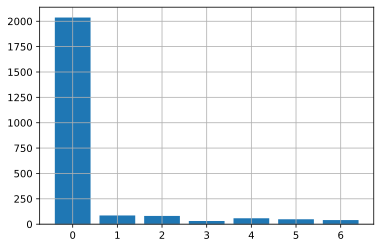

In [62]:
plt.bar(range(7), λ)
plt.grid()

Projected data to two first projection dimensions:

In [63]:
Yproj = np.matmul(Y, w[:,0:2] )

In [64]:
Yproj.shape

(60, 2)

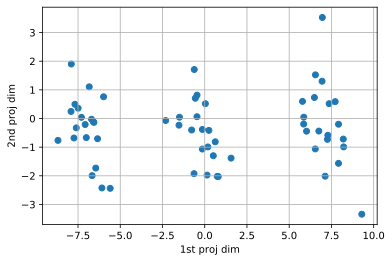

In [67]:
plt.scatter(Yproj[:,0], Yproj[:,1])
plt.xlabel("1st proj dim")
plt.ylabel("2nd proj dim")
plt.grid()

Pair plot:

In [84]:
import pandas as pd

In [82]:
import seaborn as sns
sns.set()

In [143]:
labelsString = []
for i in range(len(labels)):
    labelsString.append("class"+str(labels[i]))

In [144]:
labelsDF = pd.DataFrame(labelsString, columns=["class"])
labelsDF.head()

,class
0,class0
1,class0
2,class0
3,class0
4,class0


In [101]:
Ypd.head()

,0,1,2,3,4,5,6
0,0.471435,-1.190976,-0.748528,-0.108125,0.274779,0.237350,-0.259844
1,1.432707,-0.312652,-0.312442,0.448510,-0.059532,-0.470015,0.349567
2,-0.720589,0.887163,-1.027469,-0.306638,1.406176,-1.249697,-1.560149
3,0.859588,-0.636524,1.557398,-0.593356,-0.170289,1.672627,-0.540800
4,0.015696,-2.242685,-0.684128,0.599962,-0.217199,0.331527,-0.383365


In [145]:
YDF = pd.merge(Ypd, labelsDF, left_index=True, right_index=True)
YDF.head()

,desc1,desc2,desc3,desc4,desc5,desc6,desc7,class
0,0.471435,-1.190976,-0.748528,-0.108125,0.274779,0.237350,-0.259844,class0
1,1.432707,-0.312652,-0.312442,0.448510,-0.059532,-0.470015,0.349567,class0
2,-0.720589,0.887163,-1.027469,-0.306638,1.406176,-1.249697,-1.560149,class0
3,0.859588,-0.636524,1.557398,-0.593356,-0.170289,1.672627,-0.540800,class0
4,0.015696,-2.242685,-0.684128,0.599962,-0.217199,0.331527,-0.383365,class0


In [104]:
columns = ["desc"+str(i) for i in range(1,8)]
columns

['desc1', 'desc2', 'desc3', 'desc4', 'desc5', 'desc6', 'desc7']

In [105]:
Ypd = pd.DataFrame(Y, columns=columns)

In [106]:
Ypd.head()

,desc1,desc2,desc3,desc4,desc5,desc6,desc7
0,0.471435,-1.190976,-0.748528,-0.108125,0.274779,0.237350,-0.259844
1,1.432707,-0.312652,-0.312442,0.448510,-0.059532,-0.470015,0.349567
2,-0.720589,0.887163,-1.027469,-0.306638,1.406176,-1.249697,-1.560149
3,0.859588,-0.636524,1.557398,-0.593356,-0.170289,1.672627,-0.540800
4,0.015696,-2.242685,-0.684128,0.599962,-0.217199,0.331527,-0.383365


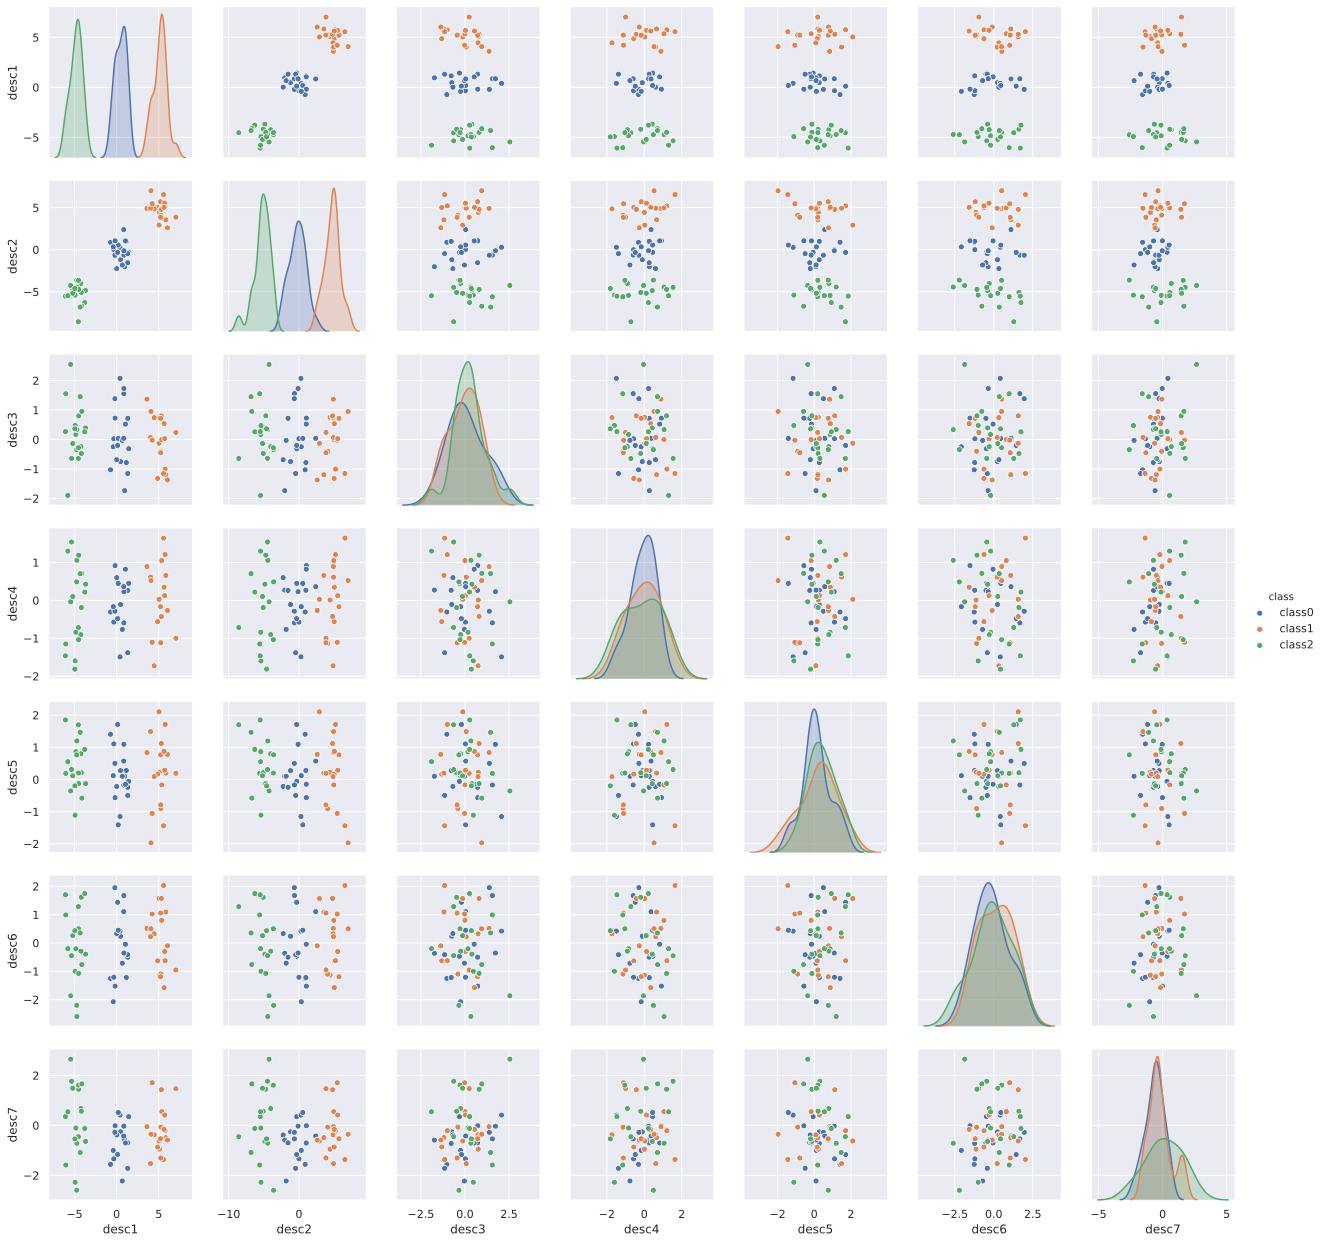

In [146]:
sns.pairplot(YDF, hue="class")

In [139]:
YDF.head()

,desc1,desc2,desc3,desc4,desc5,desc6,desc7,class
0,0.471435,-1.190976,-0.748528,-0.108125,0.274779,0.237350,-0.259844,0
1,1.432707,-0.312652,-0.312442,0.448510,-0.059532,-0.470015,0.349567,0
2,-0.720589,0.887163,-1.027469,-0.306638,1.406176,-1.249697,-1.560149,0
3,0.859588,-0.636524,1.557398,-0.593356,-0.170289,1.672627,-0.540800,0
4,0.015696,-2.242685,-0.684128,0.599962,-0.217199,0.331527,-0.383365,0


In [136]:
YDF.loc[:,:"desc7"]

,desc1,desc2,desc3,desc4,desc5,desc6,desc7
0,0.471435,-1.190976,-0.748528,-0.108125,0.274779,0.237350,-0.259844
1,1.432707,-0.312652,-0.312442,0.448510,-0.059532,-0.470015,0.349567
2,-0.720589,0.887163,-1.027469,-0.306638,1.406176,-1.249697,-1.560149
3,0.859588,-0.636524,1.557398,-0.593356,-0.170289,1.672627,-0.540800
4,0.015696,-2.242685,-0.684128,0.599962,-0.217199,0.331527,-0.383365
5,1.150036,0.991946,-0.781816,0.266237,0.279428,-1.219626,-0.723949
6,0.953324,-2.021255,-1.734778,0.271661,0.099112,-0.363090,-0.588227
7,-0.334077,0.002118,0.025942,-0.572302,1.105587,-1.208016,-1.339701
8,0.405453,0.289092,2.075185,-1.489410,-1.150953,0.419060,0.413405
9,1.321158,-1.546906,0.717577,0.261725,-0.242771,-0.501268,-0.698129
